## Final Project Submission 

Please fill out:
* Student name: MARYIMMACULATE MUMBI KARIUKI 
* Student pace: full time
* Scheduled project review date/time:Friday, September 15th,2023.  12.00 noon. 
* Instructor name: Simon Karu
* Blog post URL:


# Importing the relevant modules required .




In [196]:
# Import required libraries 
import numpy as np
import pandas as pd
import sqlite3
import datetime
import csv


# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns  


# DATA EXPLORATION


We have a dataset named bom.movie_gross.csv.gz and we need to look at how it is structured.
To acheve this we get infomation about the dataset as shown below.

In [197]:
#Using pandas, we are creating a dataFrame called "bom_movie_gross" and using it to directly read from the file path 'zippedData/bom.movie_gross.csv.gz'
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# Get information on each column's data types and data value counts as a starting point for cleaning
bom_movie_gross.info()

# How will you id movies other than title? how will you do this in a smart way?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Next we have to check how the data inside is stuctured.

In [198]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# Get information on each column's data types and data value counts as a starting point for cleaning
bom_movie_gross.describe()



,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


A question arises.
What's the relevance of this data?
In other words when was this data collected?

In [199]:
bom_movie_gross['year'].describe()

count    3387.000000
mean     2013.958075
std         2.478141
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

# Data cleaning


What are we to do with missing values?
First we check whether there exists missing values in our data and if they exist how many nuls are there


In [200]:
# Function to check for missing values in a user-specified column of a DataFrame
def missing_value_count(data, col_name):
    return data[col_name].isnull().sum()



In [201]:
#total missing values in "domestic_gross" column.
missing_value_count(bom_movie_gross, 'domestic_gross')

28

In [202]:
#total missing values in "foreign_gross" column.
missing_value_count(bom_movie_gross, 'foreign_gross')

1350

In [203]:
#total missing values in "studio" column.
missing_value_count(bom_movie_gross, 'studio')

5

Since we can't be able to use the nulls we will have to drop them.

In [204]:
bom_movie_gross.dropna(inplace=True)


Confirm that we have no nulls.

In [205]:
bom_movie_gross.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [206]:
# Convert the 'year' column to datetime format
pd.to_datetime(bom_movie_gross['year'])

# Convert 'foreign_gross' and 'domestic_gross' columns to string type
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].astype(str)
bom_movie_gross['domestic_gross'] = bom_movie_gross['domestic_gross'].astype(str)

# Remove non-numeric characters and convert 'foreign_gross' and 'domestic_gross' to float type
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].str.replace('[A-Za-z]', '').str.replace('.', '').str.replace(',', '.').astype(float)
bom_movie_gross['domestic_gross'] = bom_movie_gross['domestic_gross'].str.replace('[A-Za-z]', '').str.replace('.', '').str.replace(',', '.').astype(float)


We get rid of duplicate values and check the number of columns we have.

In [207]:
# Check for duplicate values in the column 'title'
bom_movie_gross.title.duplicated().any()

False

In [208]:
#check dimensionality of  our dataframe.
bom_movie_gross.shape

(2007, 5)

In [209]:
bom_movie_gross['domestic_gross'].describe()

count    2.007000e+03
mean     4.701984e+08
std      8.162689e+08
min      4.000000e+03
25%      6.700000e+06
50%      1.670000e+08
75%      5.605000e+08
max      9.367000e+09
Name: domestic_gross, dtype: float64

In [210]:
bom_movie_gross['foreign_gross'].describe()

count    2.007000e+03
mean     7.579038e+07
std      1.381796e+08
min      1.010000e+00
25%      3.900000e+06
50%      1.940000e+07
75%      7.595000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

In [211]:
bom_movie_gross['studio'].describe()

count     2007
unique     172
top       Uni.
freq       144
Name: studio, dtype: object

# Visualization

In [212]:
def compare_gross(data):
    plt.figure(figsize=(12, 6))
    plt.scatter(data['domestic_gross'], data['foreign_gross'], alpha=0.5)
    plt.title('Comparison of Domestic Gross vs. Foreign Gross')
    plt.xlabel('Domestic Gross')
    plt.ylabel('Foreign Gross')
    plt.grid(True)
    plt.show()



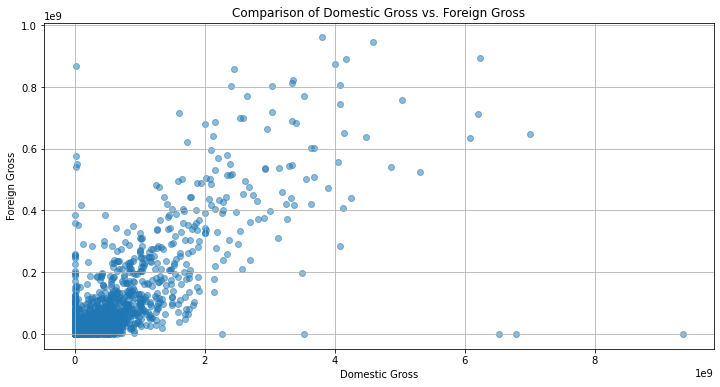

In [213]:
# Visualizing the comparison between 'domestic_gross' and 'foreign_gross'
compare_gross(bom_movie_gross)

# FINDINGS

There is a weak or nonexistent linear relationship between the performance of movies at the domestic box office and  foreign box office perfomances.

# Im.db



I was required to do a recommendation to microsoft on the type of films to create since they have decided to have a movie studio.
In order to do  this one is charged with exploring what type of films are currently  doing the best in the box office.
To achieve this we were given a dataset named Im.db.zip.
I had to unzip it and stored it in a directory named data and the database file we are to use is im.db

In [219]:
# Function to create a connection to the database
def connect_to_database(database_name):
    con = sqlite3.connect(database_name)
    cur = con.cursor()
    return con, cur

In [220]:
database_name = "datas/im.db"
con, cur = connect_to_database(database_name)

Let's confirm if we can access the movie_basics table in the database.

In [221]:
#Check if we have made the connection to movie_basics
cur.execute("SELECT * FROM movie_basics")
cur.fetchone()

('tt0063540', 'Sunghursh', 'Sunghursh', 2013, 175.0, 'Action,Crime,Drama')

We also confirm whether we have access to movie_ratings table.

In [222]:
# Check if we have made the connection to movie_ratings
cur.execute("SELECT * FROM movie_ratings")
cur.fetchone()

('tt10356526', 8.3, 31)

# Data Exploration

Now that we have the two tables we are going to need the following columns to analyze our data
1.movie_id 
2.original_title
3.start_year
4.runtime_minutes
5.averagerating
6.numvotes
7.genres


In [223]:
# Function to create a new table "movie_tables" by joining "movie_basics" and "movie_ratings"
def create_movie_tables(cur):
    cur.execute("""
        CREATE TABLE movie_tables AS
        SELECT movie_basics.movie_id, movie_basics.original_title, movie_basics.start_year, 
               movie_basics.runtime_minutes, movie_ratings.averagerating, movie_ratings.numvotes, movie_basics.genres
        FROM movie_basics
        JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
    """)

In [224]:
# Create "movie_tables" by joining "movie_basics" and "movie_ratings"
create_movie_tables(cur)

We confirm whether the table has been created and count the number of entries

In [225]:
# Check if "movie_tables" has been created
cur.execute("SELECT * FROM movie_tables")
cur.fetchone()

('tt0063540', 'Sunghursh', 2013, 175.0, 7.0, 77, 'Action,Crime,Drama')

In [226]:
def count_rows_in_table(cur, table_name):
    try:
        # Execute a SQL query to count the rows in the specified table
        cur.execute(f"SELECT COUNT(*) FROM {table_name}")
        
        # Fetch the result of the count query
        count = cur.fetchone()[0]
        
        return count
    
    except sqlite3.Error as e:
        print(f"Error counting rows in {table_name}: {e}")
        return None


In [228]:
# Count the rows in the "movie_tables" table
table_name = "movie_tables"
row_count = count_rows_in_table(cur, table_name)

if row_count is not None:
    print(f"Number of rows in {table_name}: {row_count}")


Number of rows in movie_tables: 73856


Next we remove all the null entries from our movie_tables

In [229]:
# Function to remove rows with null values in specific columns
def remove_null_rows(cur):
    cur.execute("""
        DELETE FROM movie_tables
        WHERE movie_id IS NULL OR original_title IS NULL OR start_year IS NULL OR
              runtime_minutes IS NULL OR averagerating IS NULL OR numvotes IS NULL OR genres IS NULL
    """)

In [230]:
# Remove rows with null values
remove_null_rows(cur)

We confirm that the nulls are removed 

In [231]:

# Count the rows in the "movie_tables" table
table_name = "movie_tables"
row_count = count_rows_in_table(cur, table_name)

if row_count is not None:
    print(f"Number of rows in {table_name}: {row_count}")

Number of rows in movie_tables: 65720


# ANALYZE THE DATA

Question 1.
Do we need to use the best rated movies?
To answer this we take a look at the best rated movies

In [232]:
# Function to get the top 5 movies with the highest average ratings
def get_top_rated_movies(cur):
    cur.execute("""
        SELECT DISTINCT original_title, numvotes
        FROM movie_tables
        ORDER BY averagerating DESC
        LIMIT 5
    """)
    return cur.fetchall()

In [233]:
# Get the top 5 movies with the highest average ratings
best_averagerating = get_top_rated_movies(cur)
best_averagerating

[('Exteriores: Mulheres Brasileiras na Diplomacia', 5),
 ('The Dark Knight: The Ballad of the N Word', 5),
 ('Freeing Bernie Baran', 5),
 ('Hercule contre Hermès', 5),
 ('I Was Born Yesterday!', 6)]

We also check for the lowest rated movies

In [234]:
# Function to get the top 5 movies with the lowest average ratings
def get_bottom_rated_movies(cur):
    cur.execute("""
        SELECT DISTINCT original_title, numvotes
        FROM movie_tables
        ORDER BY averagerating ASC
        LIMIT 5
    """)
    return cur.fetchall()

In [235]:
# Get the top 5 movies with the lowest average ratings
worst_averagerating = get_bottom_rated_movies(cur)
worst_averagerating

[('Hito no sabaku', 449),
 ('Kamifûsen', 489),
 ('Kikkake wa You!', 21),
 ('A Moment of Youth', 352),
 ('Kodokuna wakusei', 433)]

Having got the result brings up another question
Question 2 & 3
Does the highest rated movie have the most votes?
Does the lowest rated movie have the least votes?
Since we are focused on the best we leave the latter for now.

In [236]:
# Function to get the top 10 movies with the highest number of votes
def get_most_voted_movies(cur):
    cur.execute("""
        SELECT DISTINCT *
        FROM movie_tables
        ORDER BY numvotes ASC
        LIMIT 10
    """)
    return cur.fetchall()

In [237]:
# Get the top 10 movies with the highest number of votes
most_voted_movies = get_most_voted_movies(cur)
most_voted_movies

[('tt0276568', 'To Chase a Million', 2018, 97.0, 7.4, 5, 'Action,Drama'),
 ('tt0844699',
  "Ivan Mosjoukine ou L'enfant du carnaval",
  2016,
  67.0,
  9.0,
  5,
  'Documentary'),
 ('tt10009602', 'Meu Nome é Daniel', 2018, 82.0, 8.0, 5, 'Documentary'),
 ('tt10010134',
  "Versailles Rediscovered - The Sun King's Vanished Palace",
  2019,
  52.0,
  7.0,
  5,
  'Documentary'),
 ('tt10011772', 'Balloons over Babylon', 2019, 70.0, 8.2, 5, 'Documentary'),
 ('tt10043732', 'Oblepikhovoe leto', 2018, 87.0, 6.4, 5, 'Biography,Drama'),
 ('tt10044934', 'Bumi Itu Bulat', 2019, 103.0, 6.6, 5, 'Drama'),
 ('tt10073008', 'The Shadow of Gold', 2019, 78.0, 7.8, 5, 'Documentary'),
 ('tt10125774', 'Mens', 2019, 97.0, 5.6, 5, 'Drama'),
 ('tt10128580', 'White Mama', 2018, 97.0, 7.2, 5, 'Documentary')]

Next we search the best voted for movies and we order them by the average rating they have.

In [244]:
# Function to get the top 9 movies with the highest number of votes, ordered by average rating
def get_highest_voted_movies(cur):
    cur.execute("""
        SELECT DISTINCT averagerating, numvotes
        FROM movie_tables
        ORDER BY numvotes DESC
        
    """)
    return cur.fetchall()

In [245]:
# Get and print the top 9 movies with the highest number of votes, ordered by average rating
highest_voted_movies = get_highest_voted_movies(cur)
highest_voted_movies

[(8.8, 1841066),
 (8.4, 1387769),
 (8.6, 1299334),
 (8.4, 1211405),
 (8.1, 1183655),
 (8.2, 1035358),
 (8.1, 1005960),
 (8.1, 948394),
 (8.0, 820847),
 (7.2, 795227),
 (8.0, 784780),
 (8.1, 780910),
 (8.1, 761592),
 (7.9, 719629),
 (7.7, 710018),
 (7.2, 692794),
 (8.1, 691835),
 (7.0, 683264),
 (8.3, 682218),
 (8.0, 680116),
 (8.5, 677343),
 (8.5, 670926),
 (6.9, 668137),
 (7.8, 666252),
 (7.3, 665594),
 (7.0, 657690),
 (8.0, 648854),
 (7.1, 647288),
 (8.1, 633604),
 (8.0, 621193),
 (7.7, 621018),
 (8.0, 620834),
 (8.0, 620079),
 (8.5, 616916),
 (8.1, 611299),
 (7.7, 608930),
 (8.0, 593629),
 (7.8, 592221),
 (7.8, 583507),
 (8.1, 577301),
 (6.5, 576909),
 (7.5, 575455),
 (7.7, 568578),
 (7.8, 565563),
 (8.1, 560270),
 (7.0, 553751),
 (7.3, 553156),
 (7.9, 546284),
 (7.7, 544510),
 (6.9, 540996),
 (7.0, 539338),
 (7.0, 538720),
 (6.9, 538367),
 (8.2, 536181),
 (7.9, 535836),
 (7.7, 534683),
 (6.0, 533039),
 (8.1, 526273),
 (7.0, 525632),
 (7.8, 521495),
 (7.7, 519417),
 (7.5, 516998),
 

# Visualization 

In [248]:
# Function to create a bar chart for the top 3 movies by number of votes
def plot_top_movies_by_votes(data):
    titles = [record[0] for record in data]
    num_votes = [record[1] for record in data]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(titles, num_votes, color='skyblue')
    plt.ylabel('Number of Votes')
    plt.xlabel('Average Rating')
    plt.title('Movies by Number of Votes')
    plt.tight_layout()
    plt.show()

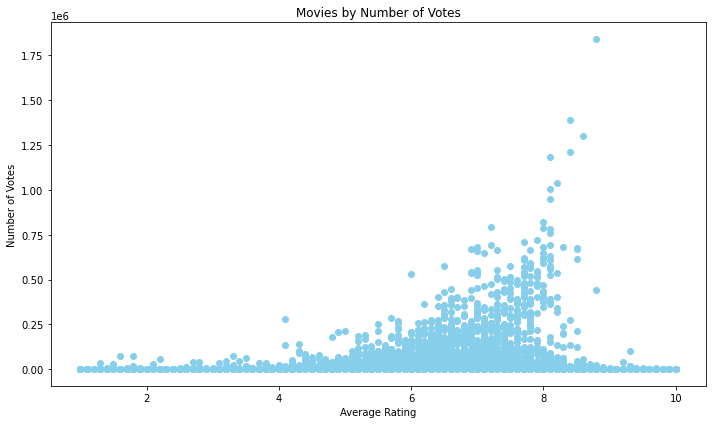

In [249]:
# Create a bar chart for the top  movies by number of votes
plot_top_movies_by_votes(highest_voted_movies)

# Finding

The observation reveals that the highest number of votes corresponds to an average rating falling within the range of 5.9 to 8.3.

Question 4
What are the most watched genres?
To answer this we further ask ourselves 2 other questions



Question 4.1
What are the best rated genres by average?

In [93]:
# Function to get the top 15 genres with the best average ratings
def get_top_genres_by_average_rating(cur):
    cur.execute("""
        SELECT genres, ROUND(AVG(averagerating), 1) AS average_rating_per_genre
        FROM movie_tables
        GROUP BY genres
        ORDER BY average_rating_per_genre DESC
        LIMIT 15
    """)
    return cur.fetchall()

In [98]:
# Get and print the top 15 genres with the best average ratings
top_genres_by_average_rating = get_top_genres_by_average_rating(cur)
top_genres_by_average_rating

[('Comedy,Documentary,Fantasy', 9.4),
 ('Documentary,Family,Musical', 9.3),
 ('Game-Show', 9.0),
 ('Drama,Short', 8.8),
 ('Documentary,News,Sport', 8.8),
 ('Documentary,News,Reality-TV', 8.8),
 ('Action,Adventure,Musical', 8.7),
 ('Biography,History,Music', 8.5),
 ('Adventure,Crime', 8.5),
 ('Mystery,News,Thriller', 8.4),
 ('Music,Musical,Romance', 8.4),
 ('Documentary,Music,War', 8.3),
 ('Documentary,Fantasy,Mystery', 8.3),
 ('Comedy,History,Musical', 8.3),
 ('Biography,Family,History', 8.3)]

Question 4.2
What is the watchtime of these genres?

In [95]:
# Function to get the top 5 genres with the greatest runtime_minutes
def get_top_genres_by_runtime(cur):
    cur.execute("""
        SELECT genres, runtime_minutes
        FROM movie_tables
        ORDER BY runtime_minutes DESC, averagerating DESC
        LIMIT 5
    """)
    return cur.fetchall()

In [96]:
# Get and print the top 5 genres with the greatest runtime_minutes
top_genres_by_runtime = get_top_genres_by_runtime(cur)
top_genres_by_runtime

[('Documentary', 51420.0),
 ('Documentary', 14400.0),
 ('Drama', 1440.0),
 ('Comedy,History', 1100.0),
 ('Drama,Fantasy,Musical', 808.0)]

In [99]:
# Function to create a bar chart for average ratings by genre
def plot_average_ratings_by_genre(data):
    genres = [row[0] for row in data]
    average_ratings = [row[1] for row in data]
    
    plt.figure(figsize=(10, 6))
    plt.bar(genres, average_ratings)
    plt.xlabel('Genres')
    plt.ylabel('Average Ratings')
    plt.title('Average Ratings by Genre')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

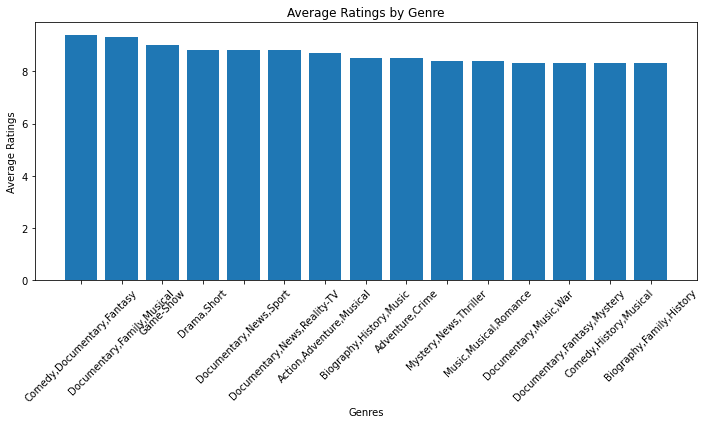

In [100]:
# Create a bar chart for average ratings by genre
plot_average_ratings_by_genre(top_genres_by_average_rating)

# Finding

The analysis indicates that genres such as documentaries, comedy, fantasy, musical, and drama garnered the highest levels of appreciation based on their respective average ratings.

In [101]:
# Close the database connection
con.close()

# RECOMMENDATIONS


1.I recommend film industry professionals adopt a diversified international approach. This entails customizing marketing strategies and content localization for specific foreign markets, recognizing that success abroad may not mirror domestic performance, ultimately enhancing global distribution and revenue potential.


2.Decision-makers in the entertainment industry to concentrate their resources and promotional efforts on content that tends to receive average ratings between 5.9 and 8.3. This range appears to resonate most with audiences and is likely to yield greater viewer engagement and satisfaction.


3.I recommend content creators prioritize genres like documentaries, comedy, fantasy, musical, and drama
which consistently receive high average ratings, indicating strong audience engagement potential.
Focusing on these genres can boost the success and impact of entertainment projects.